# 1. Load and visualize dataset

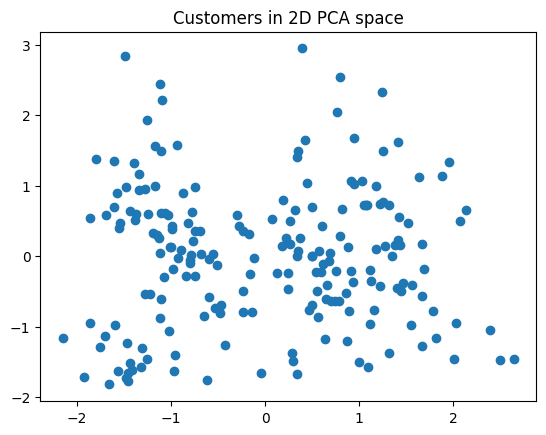

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load dataset
df = pd.read_csv("Mall_Customers.csv")

# Keep only numerical features for clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Optional: Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optional: PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title("Customers in 2D PCA space")
plt.show()


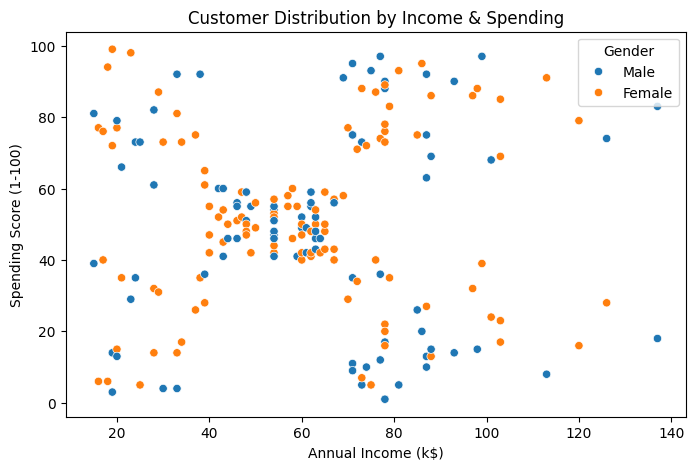

In [7]:
import seaborn as sns
# Scatter plot of meaningful features
plt.figure(figsize=(8,5))
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", hue="Gender", data=df)
plt.title("Customer Distribution by Income & Spending")
plt.show()

# 2. Fit K-Means and assign cluster labels

In [2]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


# 3. Use the Elbow Method to find optimal K

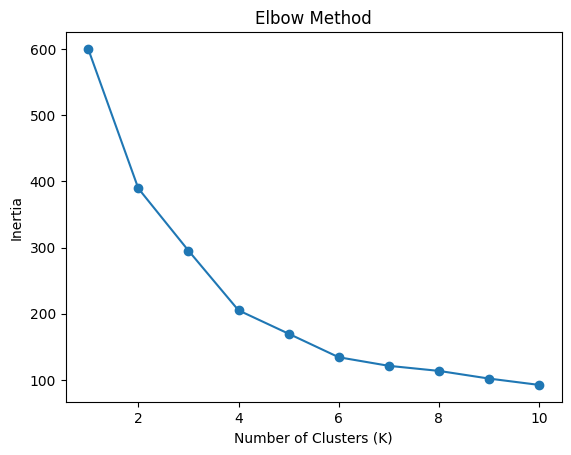

In [3]:
inertia_values = []
K_range = range(1, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia_values.append(km.inertia_)

plt.plot(K_range, inertia_values, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


Inertia drops sharply from K=1 → K=4, meaning adding more clusters significantly improves fit.

After K ≈ 5, the curve flattens — meaning extra clusters bring little improvement.

The “elbow” seems to be around K=5 or K=6.

Conclusion:
You could choose K=5 (or possibly 6) as the optimal cluster count. This balances good fit with simplicity.

# 4. Visualize clusters with color-coding
(Using PCA for plotting in 2D)

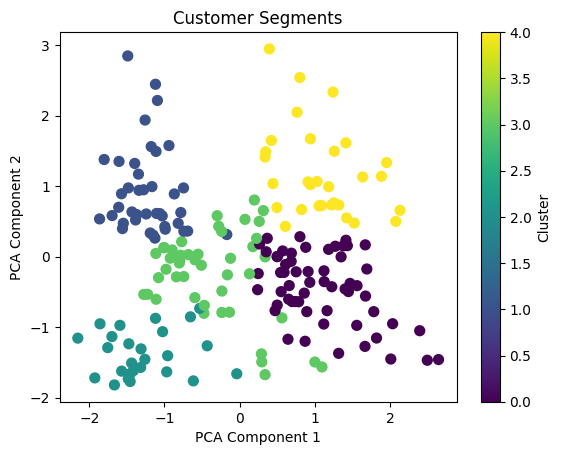

In [4]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', s=50)
plt.title("Customer Segments")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()


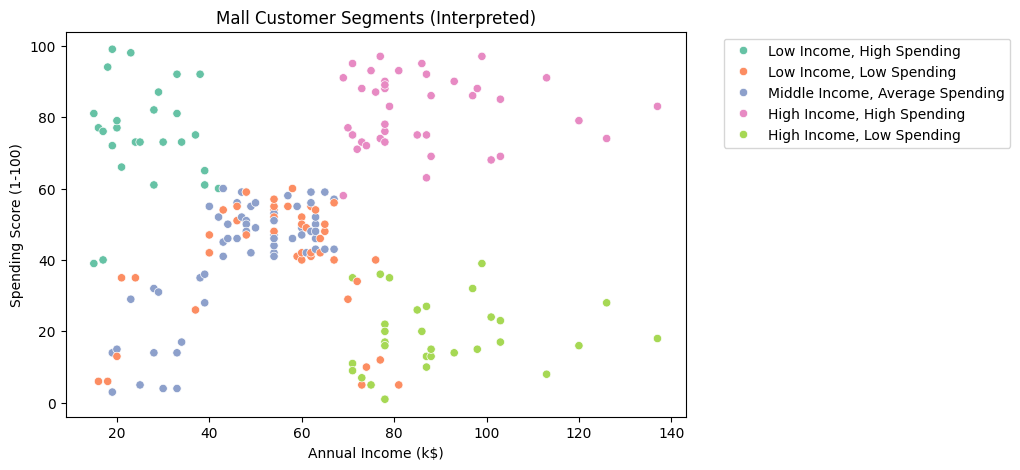

In [9]:
label_map = {
    1: "High Income, High Spending",
    4: "High Income, Low Spending",
    2: "Low Income, High Spending",
    0: "Middle Income, Average Spending",
    3: "Low Income, Low Spending"
}

df["Segment"] = df["Cluster"].map(label_map)

plt.figure(figsize=(8,5))
sns.scatterplot(x="Annual Income (k$)",
                y="Spending Score (1-100)",
                hue="Segment",
                palette="Set2",
                data=df)
plt.title("Mall Customer Segments (Interpreted)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()



# 5. Evaluate clustering using Silhouette Score

In [5]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X_scaled, df['Cluster'])
print(f"Silhouette Score: {sil_score:.3f}")


Silhouette Score: 0.408


The Silhouette Score is a clustering evaluation metric that measures how well each data point fits within its assigned cluster compared to other clusters.

It combines two ideas:

Cohesion → How close the point is to other points in the same cluster (we want this small).

Separation → How far the point is from points in the nearest different cluster (we want this large).

**Interpretation of the Score (range: -1 to 1):**

+1 → Perfectly clustered (well separated from other clusters).

0 → Overlap between clusters (point is on/near the decision boundary).

-1 → Misclassified (closer to another cluster than its own).

**Example:**

If you cluster customers into groups based on spending patterns and get:

0.7 → Strong, well-separated clusters.

0.3 → Clusters exist but overlap.

-0.2 → Bad clustering; many customers are in the wrong group.